In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats
from numpy.random import seed

# Question 1: 
Is there a difference in mean variant location between variants that are consistently classified (class 0) and variants that are conflictingly classified (class 1)?
- Null Hypothesis: There is no difference in mean relative location in protein between class 0 and class 1
- Alternate Hypothesis: There is a difference in mean relative location in protein between the two classes
- Alpha = 0.05



In [32]:
df = pd.read_csv('data_cleanednlp3.csv')

In [33]:
df.CLASS.head()

0    0
1    0
2    1
3    0
4    1
Name: CLASS, dtype: int64

In [34]:
# Split the dataframe into two groups, one for each Class
class0 = df[df.CLASS == 0]
class1 = df[df.CLASS == 1]

In [35]:
# calculate the observed means of the two groups and perform a t test not assuming variance is equal
mean_class0 = np.mean(class0.Relative_Location)
mean_class1 = np.mean(class1.Relative_Location)
tval = scipy.stats.ttest_ind(class0.Relative_Location, class1.Relative_Location, equal_var=False)
print(f'pvalue: {tval.pvalue:.3f}')
print(f'mean of Relative Location CLASS 0: {mean_class0:.3f}')
print(f'mean of Relative Location CLASS 1: {mean_class1:.3f}')

pvalue: 0.057
mean of Relative Location CLASS 0: 0.433
mean of Relative Location CLASS 1: 0.427


In [36]:
print(tval)

Ttest_indResult(statistic=1.9032535602193499, pvalue=0.057017550031068426)


Since the p value is above the threshold of 0.05, I cannot reject the null hypothesis that the mean relative locations are the same between the two groups. 

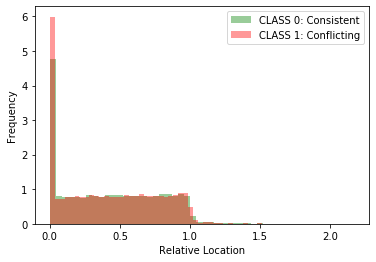

In [37]:
# Visualize the distribution of relative location
x0 = class0['Relative_Location']
x1 = class1['Relative_Location']

plt.hist(x0, alpha=0.4, bins=50, color='green', density=True, stacked=True, label='CLASS 0: Consistent')
plt.hist(x1, alpha=0.4, bins=50, color='red', density=True, stacked=True, label='CLASS 1: Conflicting')
plt.xlabel('Relative Location')
plt.ylabel('Frequency')
plt.legend();

# Question 2: Are Indels or SNPs (or any other type of variant) more prone to conflicting classification compared to other types of variants?
- Null Hypothesis: There is no difference in classification between different types of variants (i.e. indels/SNPs)
- Alternate Hypothesis: There is a difference in classification between different groups of variants
- Alpha = 0.05


In [61]:
# Build a contigency table, with variant types as column names and Class as row labels
cont_table = df[['CLNVC_Deletion', 'CLNVC_Duplication', 'CLNVC_Indel', 'CLNVC_Insertion', 
            'CLNVC_Inversion', 'CLNVC_Microsatellite', 'CLNVC_single_nucleotide_variant','CLASS']].groupby('CLASS').sum()
cont_table.head()

,CLNVC_Deletion,CLNVC_Duplication,CLNVC_Indel,CLNVC_Insertion,CLNVC_Inversion,CLNVC_Microsatellite,CLNVC_single_nucleotide_variant
CLASS,,,,,,,
0,2057,816,207,81,13,2,45578
1,452,218,40,14,4,3,15703


In [50]:
# convert the dataframe to an array 
cont_table = cont_table.to_numpy()

In [58]:
# perform the chi2 test on the contingency table and 
# calculate the critical value using the prob = 0.95 as our criteria
stat, p, dof, expected = chi2_contingency(cont_table)
prob = 0.95
critical = chi2.ppf(prob, dof)

In [60]:
# print results of chi2 test
print(f'dof: {dof}')
print(f'stat: {stat}')
print(f'critical: {critical}')
print(f'pvalue: {p}')

dof: 6
stat: 103.22131279923022
critical: 12.591587243743977
pvalue: 5.3339757870570785e-20


- Since the statistic was >= the critical value, we can reject the Null hypothesis and conclude that there is a difference in Classification across the different groups
- We can also look at the p value, which is less than alpha=0.05 to reject the null